In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Used only selected columns 
df = pd.read_csv("../Data/selected_data/merged_data.csv", usecols=['Index', 'batter', 'bowler', 'non_striker', 'total_runs_delivery', 'winning_team', 'venue', 'toss_decision', 'toss_winner', 'batting_team', 'bowling_team', 'wickets_fallen', 'runs_remain', 'current_team_total', 'over', 'delivery', 'final_team_total'])

# Identify the boundaries of each inning
inning_boundaries_indices = df[df['Index'] == 0].index.tolist()
inning_boundaries_indices.append(len(df))

# get subsequence 2 innings and create more columns for 2nd inning comparing with 1st inning
for i in range((len(inning_boundaries_indices) - 1)//2):
    start1 = inning_boundaries_indices[i]
    end1 = inning_boundaries_indices[i+1]
    
    start2 = inning_boundaries_indices[i+1]
    end2 = inning_boundaries_indices[i+2]

    # add some new columns for 1st inning
    # team run rate in each ball
    df.loc[start1:end1, 'team_run_rate_1'] = df.loc[start1:end1, 'current_team_total']*6 / (df.loc[start1:end1, 'over']*6 + df.loc[start1:end1, 'delivery'])

    # add some new columns for 2nd inning
    # team run rate in each ball
    df.loc[start2:end2, 'team_run_rate_2'] = df.loc[start2:end2, 'current_team_total']*6 / (df.loc[start2:end2, 'over']*6 + df.loc[start2:end2, 'delivery'])

    # team run rate difference between 1st and 2nd inning per ball
    # team_run_rate_diff = team_run_rate_2 - team_run_rate_1 / first check if start1:end1 and start2:end2 have same length or not
    if len(df.loc[start1:end1]) == len(df.loc[start2:end2]):
        # if same length then directly subtract
        df.loc[start2:end2, 'team_run_rate_diff'] = df.loc[start2:end2, 'team_run_rate_2'] - df.loc[start1:end1, 'team_run_rate_1']
    else:
        # if not same length then subtract by values

        # make sure that start1:end1 and start2:end2 have same length
        min_len = min(len(df.loc[start1:end1]), len(df.loc[start2:end2]))
        end1 = start1 + min_len
        end2 = start2 + min_len
        df.loc[start2:end2, 'team_run_rate_diff'] = df.loc[start2:end2, 'team_run_rate_2'] - df.loc[start1:end1, 'team_run_rate_1'].values

    # make new dataframe for 2nd inning with some chosen columns
    chose_columns = ['Index', 'total_runs_delivery', 'winning_team', 'venue', 'toss_decision', 'toss_winner', 'batting_team', 'bowling_team', 'wickets_fallen', 'runs_remain', 'current_team_total', 'team_run_rate_2', 'team_run_rate_diff', 'over', 'delivery', 'final_team_total']
    df2 = df.loc[start2:end2, chose_columns]

    # drop rows with NaN values
    df2.dropna(inplace=True)

    # drop rows with infinite values
    df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]

    # make csv file and add header only for the first time
    if i == 0:
        df2.to_csv('2nd_inning_data2.csv', index=False)
    else:
        df2.to_csv('2nd_inning_data2.csv', mode='a', header=False, index=False)


C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\3441614675.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\3441614675.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\3441614675.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\3441614675.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
C:\Users\ajani\AppData\Local\Temp\ipykernel_5411

In [9]:
import pandas as pd

df = pd.read_csv('2nd_inning_data.csv')

In [10]:
# # Python
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame
# chose_columns = ['total_runs_delivery', 'batter', 'bowler', 'non_striker', 'balls_faced','wickets_fallen', 'runs_remain', 'current_team_total', 'team_run_rate_2', 'team_run_rate_diff']

# # check above chosen columns have only numeric values or not and if not remove those from list
# for col in chose_columns:
#     if not pd.api.types.is_numeric_dtype(df[col]):
#         chose_columns.remove(col)

# print(chose_columns)

# # Create the plot
# df[chose_columns][:50].plot(kind='area', figsize=(10,10), stacked=False)

# # explain the plot
# plt.title('Area plot of the first 50 rows of the DataFrame')

# # Add labels
# plt.xlabel('Time')
# plt.ylabel('Values')

# # Show the plot
# plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47887 entries, 0 to 47886
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                47887 non-null  int64  
 1   total_runs_delivery  47887 non-null  int64  
 2   winning_team         47887 non-null  object 
 3   venue                47887 non-null  object 
 4   toss_decision        47887 non-null  object 
 5   toss_winner          47887 non-null  object 
 6   batting_team         47887 non-null  object 
 7   bowling_team         47887 non-null  object 
 8   wickets_fallen       47887 non-null  int64  
 9   runs_remain          47887 non-null  float64
 10  current_team_total   47887 non-null  int64  
 11  team_run_rate_2      47887 non-null  float64
 12  team_run_rate_diff   47887 non-null  float64
 13  over                 47887 non-null  int64  
 14  delivery             47887 non-null  float64
dtypes: float64(4), int64(5), object(6)
m

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['toss_decision','toss_winner','batting_team','bowling_team'])
]
,remainder='passthrough')

## Random Forest Classifier

In [13]:
from sklearn.metrics import log_loss
# Split the data into X and y
X = df.drop('winning_team', axis=1)
X = X.drop('Index', axis=1)
X = X.drop('venue', axis=1)
y = (df['winning_team'] == df['batting_team']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipe = Pipeline([
    ('trf', trf),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit the model
pipe.fit(X_train, y_train)

# Predict the labels
y_pred_test = pipe.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'The accuracy of the model is: {accuracy:.2f}')

# Predict win probability for each ball
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

# Create a DataFrame with the probabilities and the actual labels
results = pd.DataFrame({
    'win_probability': y_pred_proba,
    'actual': y_test
})

# Calculate the log loss
log_loss = log_loss(y_test, y_pred_proba)
print(f'The log loss of the model is: {log_loss:.2f}')





c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model is: 0.99
The log loss of the model is: 0.06


In [14]:
# Save the model
import joblib
joblib.dump(pipe, '../Models/model.joblib')

# Load the model
loaded_model = joblib.load('../Models/model.joblib')

# Predict the labels
y_pred_test = loaded_model.predict(X_test)

In [15]:
# Cross validate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
print(f'The accuracy of the model is: {scores.mean():.2f} +/- {scores.std():.2f}')

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

The accuracy of the model is: 0.77 +/- 0.03


In [16]:
# sort results according to index
results.sort_index(inplace=True)
results.head(50)

,win_probability,actual
1,0.38,1
4,0.34,1
7,0.38,1
13,0.63,1
38,0.92,1
40,0.86,1
49,0.84,1
61,0.81,1
70,0.85,1
71,0.70,1


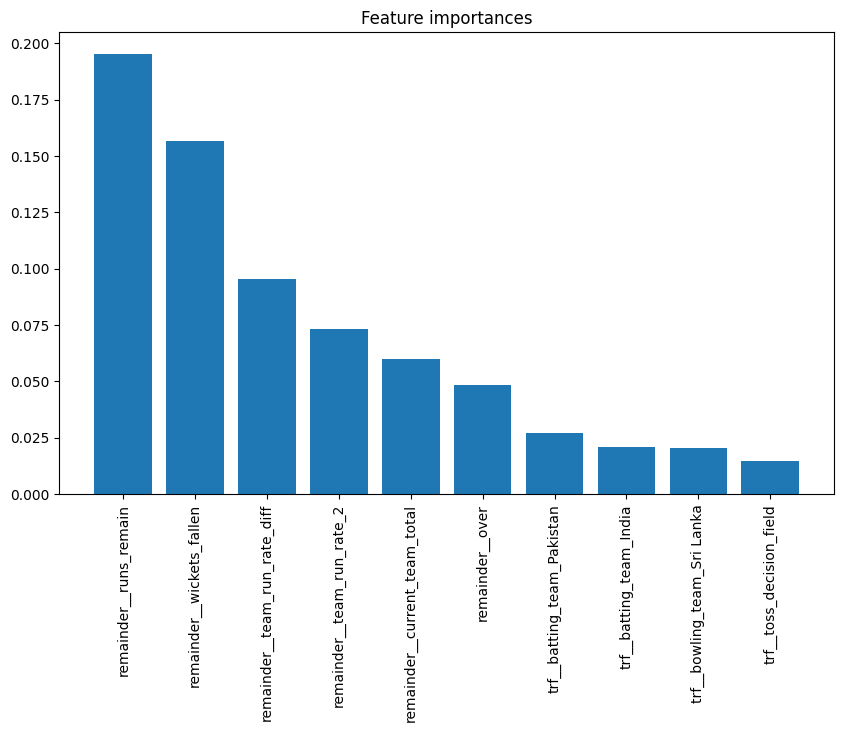

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = pipe.named_steps['clf'].feature_importances_
features = pipe.named_steps['trf'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()

C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\4199142288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test)


<Axes: ylabel='Density'>

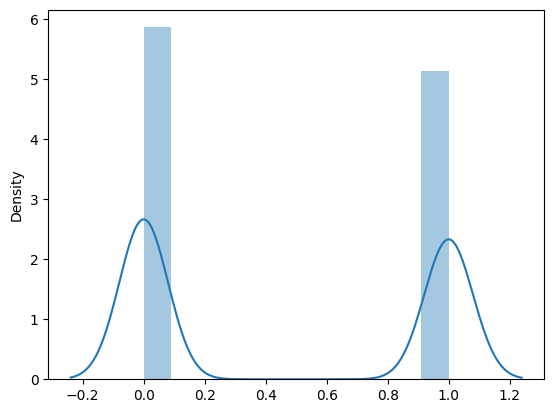

In [18]:
import seaborn as sns
sns.distplot(y_pred_test)

In [19]:
from sklearn import metrics

# Make predictions on the training data
y_train_pred = pipe.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = pipe.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R-squared (R²): 1.0

Testing Metrics:
MAE: 0.007204009187721862
MSE: 0.007204009187721862
RMSE: 0.0848764348198124
R-squared (R²): 0.9710571483827298


## XGBRegressor

In [20]:
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

from sklearn.metrics import log_loss
# Split the data into X and y
X = df.drop('winning_team', axis=1)
X = X.drop('Index', axis=1)
X = X.drop('venue', axis=1)
y = (df['winning_team'] == df['batting_team']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create the pipeline
pipe2 = Pipeline([
    ('trf', trf),
    ('scaler', StandardScaler()),
    ('clf', XGBRegressor(random_state=42))
])

# Fit the model
pipe2.fit(X_train, y_train)

# Predict the labels
y_pred_test = pipe2.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test.round())
print(f'The accuracy of the model is: {accuracy:.2f}')

# Predict win probability for each ball
y_pred_proba = pipe2.predict(X_test)

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model is: 0.97


In [21]:
# Make predictions on the training data
y_train_pred = pipe2.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = pipe2.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")

Training Metrics:
MAE: 0.0728891001214658
MSE: 0.011312946138008956
RMSE: 0.1063623342072228
R-squared (R²): 0.9546138958518853

Testing Metrics:
MAE: 0.12699097594058525
MSE: 0.037152893952342
RMSE: 0.1927508597966349
R-squared (R²): 0.850649880054084


In [22]:
# Cross validate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe2, X, y, cv=5, scoring='accuracy')
print(f'The accuracy of the model is: {scores.mean():.2f} +/- {scores.std():.2f}')

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^

The accuracy of the model is: nan +/- nan


c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ajani\AppData\Local\Programs\Python\Pytho

C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\4199142288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test)


<Axes: ylabel='Density'>

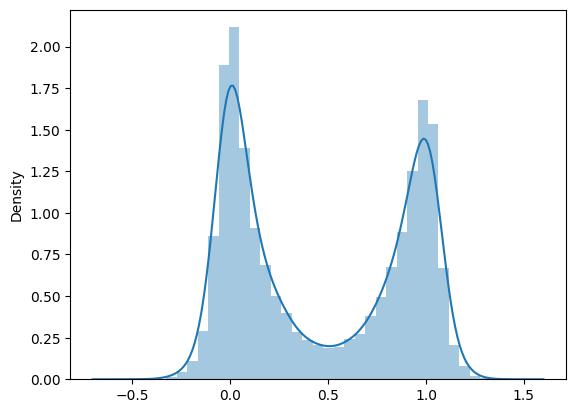

In [23]:
import seaborn as sns
sns.distplot(y_pred_test)

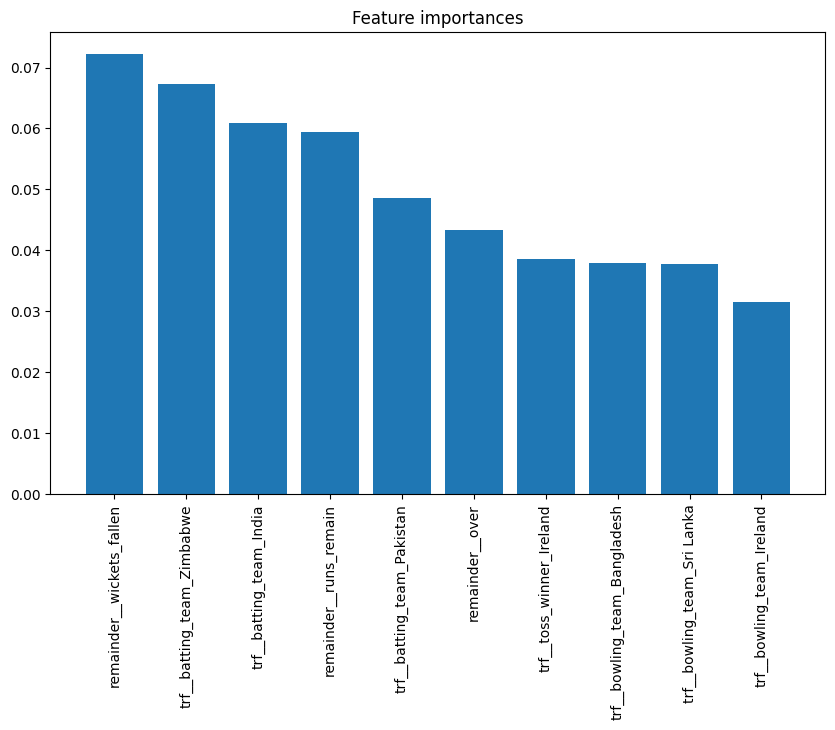

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = pipe2.named_steps['clf'].feature_importances_
features = pipe2.named_steps['trf'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()

## Linear Regression

c:\Users\ajani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ajani\AppData\Local\Temp\ipykernel_54116\2550455837.py:63: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


The accuracy of the model is: 0.85
Training Metrics:
MAE: 0.2873104400712961
MSE: 0.12160616575506154
RMSE: 0.348720756128828
R-squared (R²): 0.5121314963686823

Testing Metrics:
MAE: 0.2894372536561647
MSE: 0.123053768284778
RMSE: 0.3507902055143188
R-squared (R²): 0.5053388014214155


<Axes: ylabel='Density'>

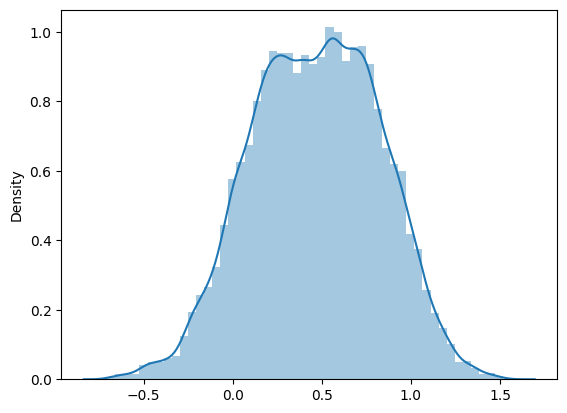

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

from sklearn.metrics import log_loss
# Split the data into X and y
X = df.drop('winning_team', axis=1)
X = X.drop('Index', axis=1)
X = X.drop('venue', axis=1)
y = (df['winning_team'] == df['batting_team']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

reg = LinearRegression()

pipe_reg = Pipeline(steps=[
    ('step1',trf),
    ('step3',reg)
])

pipe_reg.fit(X_train , y_train)

y_pred = pipe_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred.round())
print(f'The accuracy of the model is: {accuracy:.2f}')

# Predict win probability for each ball
y_pred_proba = pipe_reg.predict(X_test)

# Make predictions on the training data
y_train_pred = pipe_reg.predict(X_train)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Make predictions on the testing data
y_test_pred = pipe_reg.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared (R²): {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared (R²): {r2_test}")


import seaborn as sns
sns.distplot(y_pred)


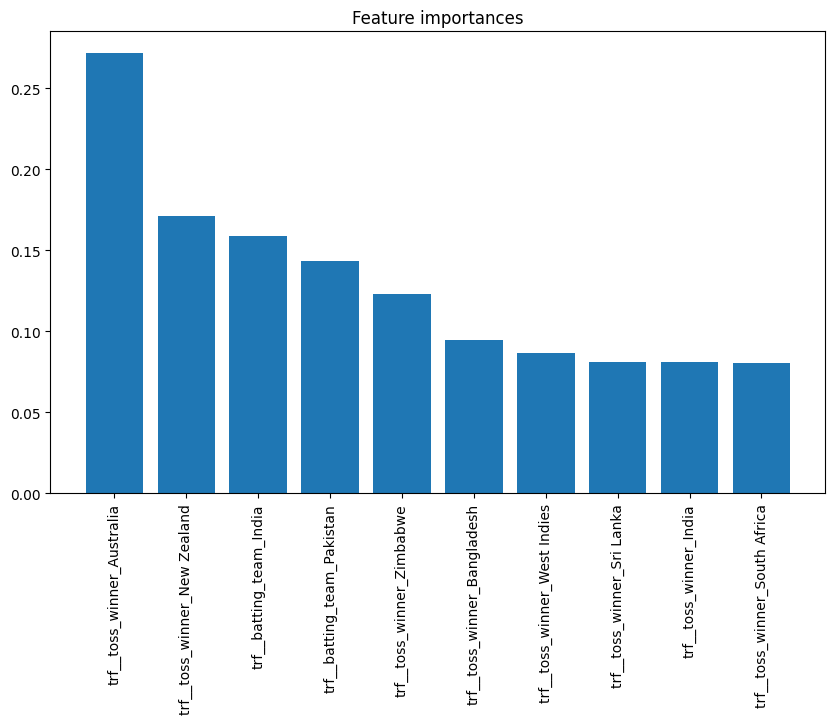

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# plot a graph to show the feature importance
# only pick the top 10 features

importances = pipe_reg.named_steps['step3'].coef_
features = pipe_reg.named_steps['step1'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)

plt.show()